In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mm9 = pd.read_csv('mm9.genes.txt', sep='\t')
hg19 = pd.read_csv('hg19.genes.txt', sep='\t')

In [3]:
mm9[:5]

,chr,start,end,strand,gene_id
0,chr1,3044314,3044814,+,Gm16088
1,chr1,3092097,3092206,+,U6
2,chr1,3195982,3661579,-,Xkr4
3,chr1,3456668,3503634,+,Gm1992
4,chr1,3668961,3669024,-,U7


In [4]:
hg19[:5]

,chr,start,end,strand,gene_id
0,chr1,11869,14412,+,DDX11L1
1,chr1,14363,29806,-,WASH7P
2,chr1,29554,31109,+,MIR1302-11
3,chr1,34554,36081,-,FAM138A
4,chr1,52473,54936,+,OR4G4P


In [5]:
def left(df):
    df['Bracketing Genes'] = df['Bracketing Genes'].apply(lambda x: re.sub('(-)\w+', '', x))
    return df
def right(df):
    df['Bracketing Genes'] = df['Bracketing Genes'].apply(lambda x: re.sub('\w+(-)', '', x))
    return df

In [6]:
ench = pd.read_csv('untitled.txt', sep='\t')
ench['chr'] = ench['Coordinates'].apply(lambda x: re.sub('(:).+', '', x))
ench['Coordinates'] = ench['Coordinates'].apply(lambda x: re.sub('.+(:)', '', x))

In [7]:
ench_h_left = ench[['ID', 'Coordinates', 'chr', 'Bracketing Genes', 'Expression']][:1848]
ench_h_right = ench[['ID', 'Coordinates', 'chr', 'Bracketing Genes', 'Expression']][:1848]
ench_m_left = ench[['ID', 'Coordinates', 'chr', 'Bracketing Genes', 'Expression']][1848:]
ench_m_right = ench[['ID', 'Coordinates', 'chr', 'Bracketing Genes', 'Expression']][1848:]

ench_h = pd.concat([left(ench_h_left), right(ench_h_right)])
ench_m = pd.concat([left(ench_m_left), right(ench_m_right)])

ench_h['Bracketing Genes'] = ench_h['Bracketing Genes'].apply(lambda x: re.sub('\(intragenic\)', '', x))
ench_m['Bracketing Genes'] = ench_m['Bracketing Genes'].apply(lambda x: re.sub('\(intragenic\)', '', x))

ench_h = ench_h[ench_h.Expression == 'Positive']
ench_m = ench_m[ench_m.Expression == 'Positive']

In [8]:
def dist(s1, s2):
    if s2[0] < s1[0]:
        s1, s2 = s2, s1
    if s1[1] >= s2[0]:
        return 0
    else:
        return s2[0] - s1[1]

In [9]:
hg19[hg19['gene_id'] == 'DDX11L1']

,chr,start,end,strand,gene_id
0,chr1,11869,14412,+,DDX11L1


In [10]:
start, end = 0, 0

In [11]:
distances = []

In [13]:
for index, row in ench_h.iterrows():  
    segment =  hg19[hg19['gene_id'] == row[3]]
    try:
        start = list(segment['start'])[0]
        end = list(segment['end'])[0]
    except:
        pass
    start, end = min(start, end), max(start, end) 
    s1 = [start, end]
    new_row = re.sub(',', '', row['Coordinates'])
    start2 = int(re.sub('.+(-)', '', new_row))
    end2 = int(re.sub('(-).+', '', new_row))
    s2 = [start2, end2]
    try:
        #print(list(segment['chr'])[0], row['chr'])
        if list(segment['chr'])[0] == row['chr']:
            distances.append(dist(s1, s2))
    except:
        pass

In [16]:
distances = np.array(distances)

In [17]:
np.median(distances)

26905.0

In [18]:
np.std(distances)

654000.89815976925

In [19]:
min(distances)

0

(0, 750000)

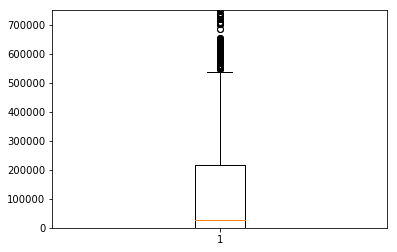

In [20]:
plt.boxplot(distances)
plt.ylim(0, 750000)

In [32]:
distances_m = []
start_m, end_m  = 0, 0

In [110]:
for index, row in ench_m.iterrows():  
    segment =  mm9[mm9['gene_id'] == row[3]]
    print(segment)
    try:
        start = list(segment['start'])[0]
        end = list(segment['end'])[0]
    except:
        pass
    start, end = min(start, end), max(start, end) 
    s1 = [start, end]
    new_row = re.sub('\[', '', row['Coordinates'])
    new_row = re.sub(',', '', row['Coordinates'])
    #print(new_row)
    try:
        start_m = int(re.sub('.+(-)', '', new_row))
        end_m = int(re.sub('(-).+', '', new_row))
        s2 = [start_m, end_m]
        #print(s2)
    except:
        pass
    try:
        print(list(segment['chr']), row['chr'])

    except:
        pass

Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr14
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[]  
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr5
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr13
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr4
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr9
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr14
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr5
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr9
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr5
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr7
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr12
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Ind

Index: []
[]  
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr11
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr22
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr6
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr22
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr8
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr3
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr5
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr10
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr8
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr8
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr2
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr22
Empty DataFrame
Columns: [chr, start, end, s

Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr11
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[]  
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr20
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr1
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr20
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr19
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr16
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr1
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr4
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr20
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr14
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr16
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]

[] chr15
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr4
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr18
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr16
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr7
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr6
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr15
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr11
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr7
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr4
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr15
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr6
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr9
Empty DataFrame
Columns: [chr, start, end, strand,

[] chr6
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr5
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr1
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr10
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr1
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr3
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr6
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr17
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr16
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr13
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr3
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr3
Empty DataFrame
Columns: [chr, start, end, strand, gene_id]
Index: []
[] chr2
Empty DataFrame
Columns: [chr, start, end, strand, g

KeyboardInterrupt: 

In [102]:
distances_m

[]